### Build Our Model

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('archive/english.csv')
directory = "archive"

imageDatas = []
files = dataset["image"]
label = dataset["label"]

i = 0
print("=======starting======")
for fileName in files:
    image=tf.keras.utils.load_img(os.path.join(directory,fileName),color_mode='grayscale',target_size=(100,100))
    image=tf.keras.utils.img_to_array(image)
    image=image/255.0
    imageDatas+=[image]
    i = i + 1
    if (i % 500 == 0):
        print(i)

class_names = dataset["label"].unique()
print(class_names)
print("=======done======")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

=======starting======
500
1000
1500
2000
2500
3000
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
=======done======


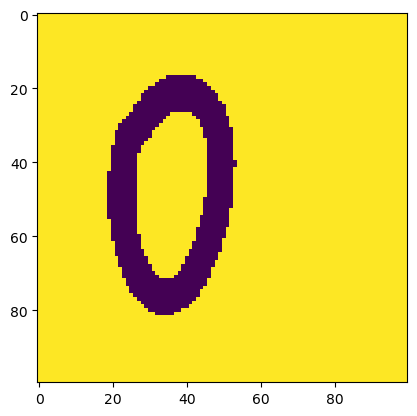

label:  0


In [3]:
plt.imshow(imageDatas[0])
plt.show()

print("label: ", label[0])
# print(imageDatas[0][20])

(100, 100, 1)
=====start compressing=====
compressed:  500  imgs
compressed:  1000  imgs
compressed:  1500  imgs
compressed:  2000  imgs
compressed:  2500  imgs
compressed:  3000  imgs
=====done compressing=====
(3410, 25, 25, 1)


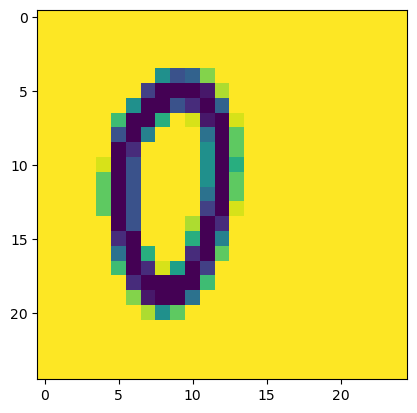

In [34]:
ImageData_compressed = []
compressRatio = 4
dimention = int(100 / compressRatio)  # final dimention

print(np.array(imageDatas[0]).shape) 

# test = []
# test += [imageDatas[0]]
count = 0
print("=====start compressing=====")
for img in imageDatas:
    img_compressed = []
    for i in range(dimention):
        row_compressed = []
        for j in range(dimention):
            avg = 0
            for r in range(compressRatio):
                for c in range(compressRatio):
                    avg += (img[compressRatio * i + r][compressRatio *j + c]) / compressRatio
            row_compressed += [avg/25]
            # print(np.array(row_compressed).shape)
            
        img_compressed += [row_compressed]
        # print(np.array(img_compressed).shape)
    ImageData_compressed += [img_compressed]
    count += 1
    if (count % 500 == 0):
        print("compressed: ", count, " imgs" )

ImageData_compressed = np.array(ImageData_compressed)
print("=====done compressing=====")
print(ImageData_compressed.shape)
plt.imshow(ImageData_compressed[0])
plt.show()

In [4]:
import numpy
dimention = "100x100"
npzFileName = "Uncompressed_" + dimention + ".npz"

imageDatas_np = np.array(imageDatas)
# Save compressed data to NPZ file
numpy.savez(npzFileName, imageDatas_np=imageDatas_np)
print("=======done saving======")

=======done saving======


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset = pd.read_csv('archive/english.csv')
directory = "archive"

imageDatas = []
files = dataset["image"]
label = dataset["label"]
dimention = "100x100"
npzFileName = "Uncompressed_" + dimention + ".npz"

# Load  compressed image matrix data
data = numpy.load(npzFileName)
ImageData_compressed = data['imageDatas_np']
print("=======done load======")

print(ImageData_compressed.shape)

=======done load======
(3410, 100, 100, 1)


In [5]:
def getIndex(letter):
    index = ord(letter)-48
    if (index > 10):
        index -= 7
    if (index > 35):
        index -= 6
    return index

In [3]:
from sklearn.model_selection import train_test_split
data_nparr=ImageData_compressed
# data_nparr=np.array(ImageData_compressed_type2)
# data_nparr=np.array(imageDatas)
label_nparr=np.array(label)
label_index_nparr = np.vectorize(getIndex)(label_nparr)

train_data, test_data, train_label, test_label = train_test_split(data_nparr, label_index_nparr, test_size=0.1, random_state=42)
print("data splited")

data splited


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

print("Input shape:", data_nparr[0].shape)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=data_nparr[0].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(62, activation='softmax'))
print("Layers added")
model.summary()

Input shape: (100, 100, 1)
Layers added
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("======start training======")
history = model.fit(train_data, train_label, epochs=5, 
                    validation_data=(test_data, test_label))
print("======done training======")

======start training======
Epoch 1/5
96/96 [==============================] - 6s 58ms/step - loss: 4.0567 - accuracy: 0.0303 - val_loss: 3.7247 - val_accuracy: 0.0850
Epoch 2/5
96/96 [==============================] - 6s 59ms/step - loss: 2.7238 - accuracy: 0.3102 - val_loss: 2.3619 - val_accuracy: 0.3724
Epoch 3/5
96/96 [==============================] - 5s 55ms/step - loss: 1.5509 - accuracy: 0.5780 - val_loss: 1.5328 - val_accuracy: 0.5865
Epoch 4/5
96/96 [==============================] - 5s 55ms/step - loss: 0.9994 - accuracy: 0.7208 - val_loss: 1.2946 - val_accuracy: 0.6716
Epoch 5/5
96/96 [==============================] - 5s 57ms/step - loss: 0.7206 - accuracy: 0.7830 - val_loss: 1.2047 - val_accuracy: 0.7038
======done training======


In [21]:
# save model
model.save('../CNN_ver1.h5')
print("======model saved======")

======model saved======


11/11 - 0s - loss: 1.2047 - accuracy: 0.7038 - 158ms/epoch - 14ms/step


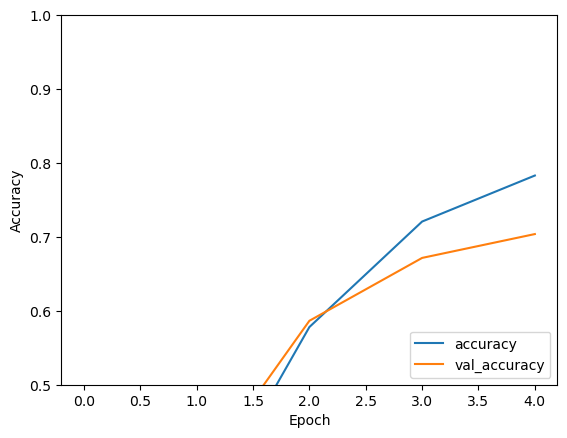

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=2)

In [9]:
print(test_acc)

0.703812301158905


In [10]:
ImageData_compressed.shape

(3410, 100, 100, 1)

In [51]:
print(type(ImageData_compressed[0][0][0][0]))
print(ImageData_compressed[0].shape)
class_names = ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
# class_names = class_names[0]

test = np.array([ImageData_compressed[0]])
print(test.shape)
p = model.predict(test)
print(p.shape)

# Get the indices of the largest 4 numbers
largest_indices = np.argpartition(p[0], -4)[-4:]

result = []
for index in largest_indices:
    result += [class_names[0][index]]
    
print(result)

<class 'numpy.float32'>
(100, 100, 1)
(1, 100, 100, 1)
1/1 [==============================] - 0s 14ms/step
(1, 62)
['J', 'I', 'D', '0']


In [68]:
y_pred = model.predict(ImageData_compressed)
y_actual = label_index_nparr
class_names = ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
class_names = class_names[0]

checking = 1002
print(y_pred.shape)
print(y_actual[checking])
print(class_names[y_actual[checking]])
print(np.argmax(y_pred[checking]))
print(class_names[np.argmax(y_pred[checking])])

107/107 [==============================] - 2s 20ms/step
(3410, 62)
18
I
1
1


In [69]:
Result = []
oneCharResult = []
for letter in range(len(class_names)):
    oneCharResult = []
    for predicte in range(len(class_names)):
        oneCharResult += [0]
    Result +=[oneCharResult]

allCount = 0
count = 0
count2 = 0
for i in range(3410):
    pred = np.argmax(y_pred[i])
    actual = y_actual[i]
    
    
    if pred == actual:
        count2 = count2 + 1
    else:
        count = count + 1
        actualLetter = int(i/55)
        Result[actualLetter][pred] = Result[actualLetter][pred] + 1

print(Result[0])
print(np.argmax(Result[0]))
print(class_names[np.argmax(Result[0])])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24
O


In [70]:
falsePredict = []

for letter in range(len(class_names)):
    haveNotPrintLetter = 1
    for p in range(len(class_names)):
        if Result[letter][p] > 3:
            if haveNotPrintLetter == 1:
                print("Letter '", class_names[letter])
                haveNotPrintLetter = 0
            print("   - mispredict: [", class_names[p], "] ",Result[letter][p])
        
    falsePredict += [np.sum(Result[letter])]
    
print(falsePredict)

Letter ' 1
   - mispredict: [ I ]  8
   - mispredict: [ j ]  6
   - mispredict: [ l ]  7
Letter ' 2
   - mispredict: [ z ]  7
Letter ' 3
   - mispredict: [ z ]  4
Letter ' 5
   - mispredict: [ S ]  4
Letter ' C
   - mispredict: [ c ]  11
Letter ' H
   - mispredict: [ M ]  4
Letter ' I
   - mispredict: [ j ]  7
   - mispredict: [ l ]  8
Letter ' K
   - mispredict: [ k ]  6
Letter ' O
   - mispredict: [ 0 ]  30
Letter ' P
   - mispredict: [ p ]  10
Letter ' S
   - mispredict: [ s ]  7
Letter ' Y
   - mispredict: [ V ]  6
Letter ' Z
   - mispredict: [ z ]  9
Letter ' c
   - mispredict: [ e ]  19
Letter ' f
   - mispredict: [ j ]  6
   - mispredict: [ p ]  5
Letter ' i
   - mispredict: [ j ]  10
Letter ' k
   - mispredict: [ K ]  4
Letter ' l
   - mispredict: [ i ]  4
   - mispredict: [ j ]  4
Letter ' m
   - mispredict: [ n ]  11
Letter ' o
   - mispredict: [ 0 ]  10
   - mispredict: [ p ]  4
Letter ' r
   - mispredict: [ n ]  9
Letter ' v
   - mispredict: [ V ]  9
   - mispredict: [ y ] 